In [1]:
import glob
import numpy as np

import matplotlib.pyplot as plt

# cognac data and tools
import cognac.insitu as iu

---
## load and select data

gps files may have to be edited manually 

In [2]:
# select campaign

#campaign = 'microco_leg2'
#campaign = 'lopstech19_leg1'
#campaign = 'cognac20'
campaign = 'sumos21'

cp = iu.campaign(campaign)

In [3]:
import os
import xarray as xr

In [4]:
def load_spots(path):
    files = sorted(glob.glob(os.path.join(path,'SPOT??.nc')))
    get_id = lambda f: f.split('/')[-1].replace('SPOT','').replace('.nc','')
    D = {get_id(f): xr.open_dataset(f) for f in files}
    #for sid, s in D.items():
    #    D[sid] = s.where(s.spec_qc_flag==0, drop=False)
    #
    #files = sorted(glob.glob(os.path.join(path,'SPOT??_log.nc')))
    #get_id = lambda f: f.split('/')[-1].replace('SPOT','').replace('_log.nc','')
    #D_log = {get_id(f): xr.open_dataset(f) for f in files}
    #return D, D_log
    return D

D = load_spots(cp['spots']["path"])

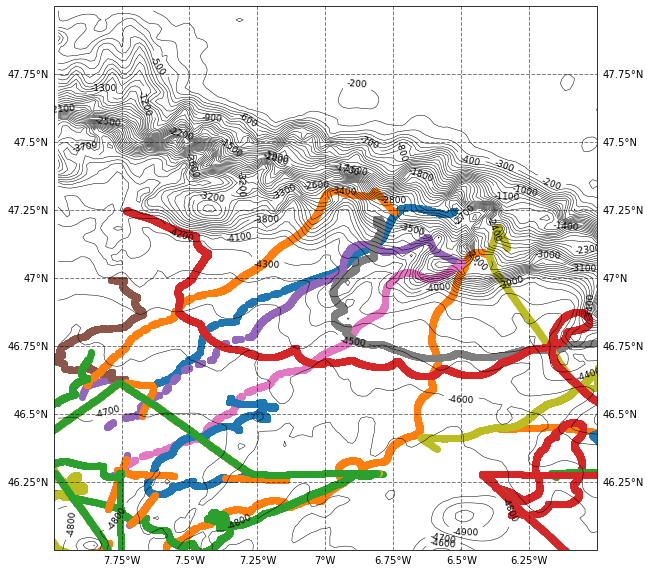

In [5]:
fac = cp.plot_map(bounds=[-8,-6, 46, 48])

for sid, s in D.items():
    s.plot.scatter(x='longitude', y='latitude', ax=fac[1])

In [32]:
sid = "01"
s = D[sid]

gps = {} 
for sid, s in D.items():

    df = (s.rename({"longitude": "lon", 
                    "latitude": "lat", 
                    "gps_time": "time",
                   })
          [["lon", "lat"]]
          .to_dataframe()
         )
    g = iu.gps.gps(df=df, label=sid)
    g.compute_velocity(inplace=True)
    g.d.mask(g.d.velocity>.8, inplace=True)
    g = g.resample('10T')
    
    gps[sid] = g

In [33]:
gps

{'01': cognac.insitu.gps.gps(01 - 3338 points),
 '02': cognac.insitu.gps.gps(02 - 3328 points),
 '03': cognac.insitu.gps.gps(03 - 3261 points),
 '04': cognac.insitu.gps.gps(04 - 3050 points),
 '06': cognac.insitu.gps.gps(06 - 3346 points),
 '07': cognac.insitu.gps.gps(07 - 2901 points),
 '09': cognac.insitu.gps.gps(09 - 2675 points),
 '11': cognac.insitu.gps.gps(11 - 2938 points),
 '12': cognac.insitu.gps.gps(12 - 3042 points),
 '13': cognac.insitu.gps.gps(13 - 2671 points),
 '15': cognac.insitu.gps.gps(15 - 2965 points),
 '17': cognac.insitu.gps.gps(17 - 2651 points),
 '19': cognac.insitu.gps.gps(19 - 2892 points),
 '20': cognac.insitu.gps.gps(20 - 2912 points)}

<AxesSubplot:>

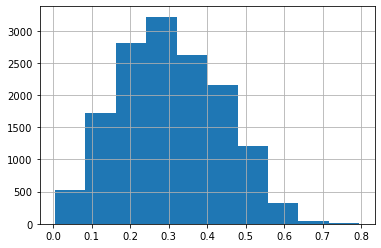

In [29]:
g.d.velocity.hist()

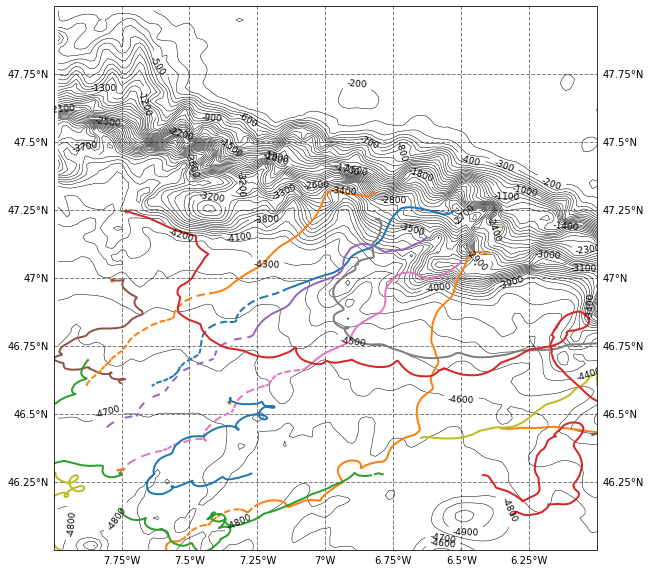

In [35]:
fac = cp.plot_map(bounds=[-8,-6, 46, 48])

for sid, g in gps.items():
    g.plot(fac=fac)

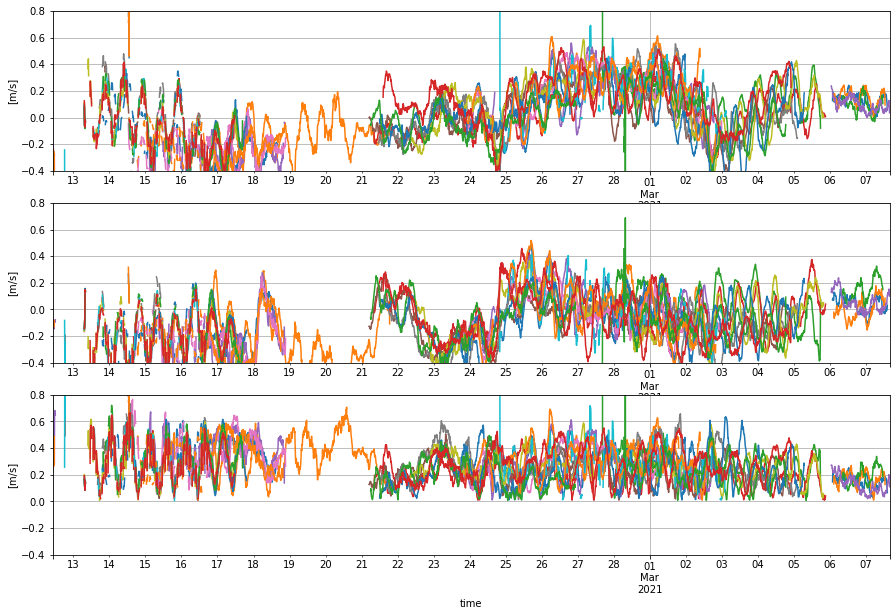

In [44]:
d = "d1"

fig, axes = plt.subplots(3, 1, figsize=(15,10))

for sid, g in gps.items():
    #_g = g["d1"].resample("10T")
    _g = g
    df = _g.compute_velocity(inplace=False)
    df["u"].plot(ax=axes[0], label="u "+sid, xlabel="")
    df["v"].plot(ax=axes[1], label="v "+sid, xlabel="")
    df["velocity"].plot(ax=axes[2], label="uv"+ sid)

for ax in axes:
    ax.set_ylim([-.4, .8])
    ax.grid()
    #ax.legend()
    ax.set_ylabel("[m/s]")

### quick peak at spectra

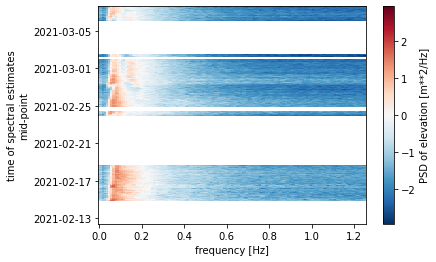

In [46]:
np.log10(D["01"].where(D["01"].spec_qc_flag==0, drop=False)).Szz.plot()

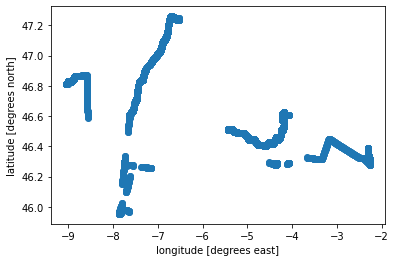

In [35]:
D_log["01"].plot.scatter(x='longitude', y='latitude')

--- 
## store

In [36]:
for label, lgps in gps.items():
    if lgps:
        lgps.to_nc(cp.pathp+'spot_'+label+'.nc')

Data store to /Users/aponte/Current_projects/cognac/campagnes/2021_sumos/data/datap/spot_01.nc
Data store to /Users/aponte/Current_projects/cognac/campagnes/2021_sumos/data/datap/spot_02.nc
Data store to /Users/aponte/Current_projects/cognac/campagnes/2021_sumos/data/datap/spot_03.nc
Data store to /Users/aponte/Current_projects/cognac/campagnes/2021_sumos/data/datap/spot_04.nc
Data store to /Users/aponte/Current_projects/cognac/campagnes/2021_sumos/data/datap/spot_06.nc
Data store to /Users/aponte/Current_projects/cognac/campagnes/2021_sumos/data/datap/spot_07.nc
Data store to /Users/aponte/Current_projects/cognac/campagnes/2021_sumos/data/datap/spot_09.nc
Data store to /Users/aponte/Current_projects/cognac/campagnes/2021_sumos/data/datap/spot_11.nc
Data store to /Users/aponte/Current_projects/cognac/campagnes/2021_sumos/data/datap/spot_12.nc
Data store to /Users/aponte/Current_projects/cognac/campagnes/2021_sumos/data/datap/spot_13.nc
Data store to /Users/aponte/Current_projects/cogna

### read

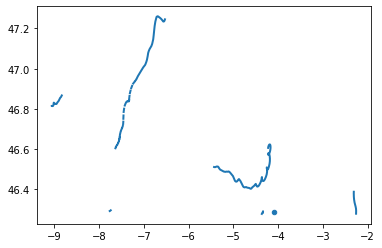

In [51]:
# reload
files = sorted(glob.glob(os.path.join(cp.pathp,'spot*.nc')))
get_id = lambda f: f.split('/')[-1].replace('spot_','').replace('.nc','')
gps = {get_id(f): iu.gps.gps(file=f) for f in files}

#gps = cp.load('gps', unit=unit)[unit]
gps["01"].plot()